*Marjolaine Claret, 15/06/19-25/07/19*

My work was to compare different architectures of neural networks on the results they give on text classification, then to visualize word embedding and in addition to plot words existing in the NRC Emotional Lexicon.

The data base I use is a set of 50,000 highly-polarized reviews from the Internet Movie Database.

In [64]:
from keras import backend as K

# Preparing data

*Sources* : <br>
[NLP and Word Embeddings, *kaggle.com*](https://www.kaggle.com/jannesklaas/17-nlp-and-word-embeddings#Using-our-model)

[IMDb datasets, *imdb.com*](https://www.imdb.com/interfaces/)

[Large Movie Review Dataset, *kaggle.com*](https://www.kaggle.com/pankrzysiu/keras-imdb)

## Training data

### Loading data

In [1]:
from tqdm import tqdm
import os

In [2]:
directory = !pwd
if directory != ['/Users/macbook/Documents/Stages/CNRS'] :
    os.chdir('./Documents/Stages/CNRS')

In [3]:
!ls ./IMDB/glove-global-vectors-for-word-representation

glove.6B.100d.txt glove.6B.200d.txt glove.6B.50d.txt


In [49]:
imdb_dir = './IMDB/keras-imdb/aclImdb' # data directory
train_dir = os.path.join(imdb_dir, 'train') # get the path of the train set

In [50]:
# Setup empty lists to fill
labels = []
texts = []

for label_type in ['neg', 'pos']:
    # Get the sub path
    dir_name = os.path.join(train_dir, label_type)
    print('loading ',label_type)
    # Loop over all files in path
    for fname in tqdm(os.listdir(dir_name)):
        
        # Only consider text files
        if fname[-4:] == '.txt':
            # Read the text file and put it in the list
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            # Attach the corresponding label
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

  1%|▏         | 165/12500 [00:00<00:07, 1643.81it/s]

loading  neg


  1%|          | 150/12500 [00:00<00:08, 1493.93it/s]

loading  pos


100%|██████████| 12500/12500 [00:04<00:00, 2578.68it/s]


In [6]:
len(labels), len(texts)

(25000, 25000)

A positive review :

In [7]:
print('Label',labels[24002])
print(texts[24002])

Label 1
This film is brilliant! It touches everyone who sees it in an extraordinary way. It really takes you back to your youth and puts a new perspective on how you view your childhood memories. There are so many layers to this film. It is innovative and absolutely fabulous!


A negative review :

In [8]:
print('Label',labels[1])
print(texts[1])

Label 0
Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think that dressing the people who had stared in the other movies up as though they we're from the wild west would make the movie (with the exact same occurrences) any better? honestly, i would never suggest buying this movie, i mean, there are cheaper wa

### Tokenizing text

A **token** is is a number that represents a word, commonly less often used words will get very high numbers (assigned by word frequency).

In [51]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

$\implies$ we get **hot vectors**

In [95]:
with open("texts.txt", "wb") as fp:
    pickle.dump(texts, fp)

We consider the 10000 most used words in the dataset.

In [96]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts) # generate tokens by counting frequency
sequences = tokenizer.texts_to_sequences(texts) # turn text into sequence of numbers

In [54]:
word_index = tokenizer.word_index
print('Token for "the"',word_index['the'])
print('Token for "generator"',word_index['generator'])

Token for "the" 1
Token for "generator" 20126


The review has been converted into a sequence of numbers :

In [14]:
sequences[24002][:10]
np.mean([len(S) for S in sequences])

224.05292

### Forming training and validation data 

In [55]:
from keras.preprocessing.sequence import pad_sequences

We have to ensure all text sequences have the same lenght (100 words long, longer are truncated) :

In [57]:
maxlen = 100
data = pad_sequences(sequences, maxlen=maxlen)
print(data.shape)

(25000, 100)


We can now turn data into training and validation data :

In [97]:
labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

The model will be trained on 20 000 samples of the file train :

In [101]:
training_samples = 20000

The model will be validated on 5 000 samples of the file train for each epoch :

In [102]:
validation_samples = 5000

We then split data :

In [100]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [60]:
print(len(x_train), len(y_train))

20000 20000


In [32]:
np.save('IMDB/x_train.npy', x_train)
np.save('IMDB/x_val.npy', x_val)
np.save('IMDB/y_train.npy', y_train)
np.save('IMDB/y_val.npy', y_val)

## Data test

In [35]:
all_embs = np.load('all_embs.npy')    
emb_mean = all_embs.mean()
emb_std = all_embs.std()
max_words = 10000
maxlen = 100
with open("texts.txt", "rb") as fp:   
    texts = pickle.load(fp)
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts)
embedding_dim = 100
word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_dim))
pickle_in = open("embeddings_index.pickle","rb")
embeddings_index = pickle.load(pickle_in)

In [36]:
os.getcwd()

'/Users/macbook/Documents/Stages/CNRS/IMDB'

In [13]:
directory = !pwd
if directory != ['/Users/macbook/Documents/Stages/CNRS/IMDB'] :
    os.chdir('./IMDB')

In [37]:
imdb_dir = './keras-imdb/aclImdb'
test_dir = os.path.join(imdb_dir, 'test')

In [38]:
labels_test = []
texts_test = []

for label_type in ['neg', 'pos']:
    # Get the sub path
    dir_name = os.path.join(test_dir, label_type)
    print('loading ',label_type)
    # Loop over all files in path
    for fname in tqdm(os.listdir(dir_name)):
        
        # Only consider text files
        if fname[-4:] == '.txt':
            # Read the text file and put it in the list
            f = open(os.path.join(dir_name, fname))
            texts_test.append(f.read())
            f.close()
            # Attach the corresponding label
            if label_type == 'neg':
                labels_test.append(0)
            else:
                labels_test.append(1)

  1%|          | 150/12500 [00:00<00:08, 1499.52it/s]

loading  neg


  2%|▏         | 207/12500 [00:00<00:05, 2068.26it/s]

loading  pos


100%|██████████| 12500/12500 [00:05<00:00, 2349.21it/s]


In [39]:
max_words = 10000
sequences_test = tokenizer.texts_to_sequences(texts_test)

In [40]:
maxlen = 100
data_test = pad_sequences(sequences_test, maxlen=maxlen)
print(data_test.shape)

(25000, 100)


In [41]:
labels_test = np.asarray(labels_test)

indices_test = np.arange(data_test.shape[0])
np.random.shuffle(indices_test)
data_test = data_test[indices_test]
labels_test = labels_test[indices_test]

In [90]:
x_test = data_test
y_test = labels_test

In [91]:
print(x_test.shape, y_test.shape)

(25000, 100) (25000,)


In [92]:
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)

# Embeddings

*Source* : <br>
[NLP and Word Embeddings, *kaggle.com*](https://www.kaggle.com/jannesklaas/17-nlp-and-word-embeddings#Using-our-model)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [ ]:
embedding_dim = 50
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 660,065
Trainable params: 660,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6918 - val_acc: 0.5190
Epoch 2/10
1000/1000 [==============================] - 1s 956us/step - loss: 0.5830 - acc: 0.8950 - val_loss: 0.6868 - val_acc: 0.5470
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2923 - acc: 0.9920 - val_loss: 0.6749 - val_acc: 0.5910
Epoch 4/10
1000/1000 [==============================] - 1s 980us/step - loss: 0.0499 - acc: 1.0000 - val_loss: 0.6788 - val_acc: 0.6020
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.6913 - val_acc: 0.6070
Epoch 6/10
1000/1000 [==============================] - 1s 957us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.6983 - val_acc: 0.6110
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0045 - acc: 1.00

# Loading and preparing Pre trained Embeddings

*Sources* : <br>
[NLP and Word Embeddings, *kaggle.com*](https://www.kaggle.com/jannesklaas/17-nlp-and-word-embeddings#Using-our-model)

[GloVe : Global Vectors for Word Representation, *nlp.stanford.edu*](https://nlp.stanford.edu/projects/glove/)

In [ ]:
import pickle

We download GloVe a pre trained embbeding :

In [ ]:
glove_dir = './IMDB/glove-global-vectors-for-word-representation'

We create a dictionary of word $\to$ embedding :

In [ ]:
print('Loading word vectors')
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt')) 

Loading word vectors


In the dataset, each line represents a new word embedding and the line starts with the word and the embedding values follow.

In [ ]:
for line in tqdm(f):
    values = line.split()
    word = values[0] 
    embedding = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = embedding
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:12, 32224.90it/s]

Found 400000 word vectors.


In [ ]:
embeddings_ind = open("embeddings_index.pickle","wb")
pickle.dump(embeddings_index, embeddings_ind)
embeddings_ind.close()

Not all words that are in our IMDB vocabulary might be in the GloVe embeddings and for missing words we use random embeddings with the same mean and standard deviation as the GloVe embeddings.<br><br>
We create a matrix of all embeddings :

In [ ]:
all_embs = np.stack(embeddings_index.values())

Calculate mean :

In [ ]:
emb_mean = all_embs.mean()

Calculate standard deviation :

In [ ]:
emb_std = np.std(all_embs)

In [ ]:
emb_mean,emb_std

# Embedding Layer with the Pre trained Embeddings

*Sources* : <br>
[NLP and Word Embeddings, *kaggle.com*](https://www.kaggle.com/jannesklaas/17-nlp-and-word-embeddings#Using-our-model)

[Hierarchical Attention Networks, *medium.com*](https://medium.com/analytics-vidhya/hierarchical-attention-networks-d220318cf87e)

[How to Develop a Deep Convolutional Neural Network for Sentiment Analysis (Text Classification), *machinelearningmastery.com*](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)

[CNN Long Short-Term Memory Networks, *machinelearningmastery.com*](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/)

In [86]:
from matplotlib import pyplot as plt
import statistics

We will use not trainable Embeddings :

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index)) # how many words are there actually
print (max_words, len(word_index))

Create a random matrix with the same mean and std as the embeddings :

In [ ]:
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_dim))

The vectors need to be in the same position as their index. 

In [ ]:
for word, i in word_index.items():
    if i < max_words: 
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector

The embedding matrix can be used as weights for the embedding layer $\implies$ the embedding layer uses the pre trained GloVe weights instead of random ones. 

We set the embedding layer to not be trainable $\Longleftrightarrow$ Keras won't change the weights of the embeddings while training which makes sense since our embeddings are already trained.

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_glove.add(Flatten())
model_glove.add(Dense(32, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.summary()

In [ ]:
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model_glove.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

# Comparison of different architectures

In [5]:
import numpy as np
import pickle
import os
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional, Dropout
from keras_self_attention import SeqSelfAttention
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import backend as K

In [6]:
directory = !pwd
if directory != ['/Users/macbook/Documents/Stages/CNRS/IMDB'] :
    os.chdir('./IMDB')

In [8]:
all_embs = np.load('all_embs.npy')    
emb_mean = all_embs.mean()
emb_std = all_embs.std()
max_words = 10000
maxlen = 100
with open("texts.txt", "rb") as fp:   
    texts = pickle.load(fp)
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts)
embedding_dim = 100
word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_dim))
pickle_in = open("embeddings_index.pickle","rb")
embeddings_index = pickle.load(pickle_in)

In order to compare different architectures of the NN for the train we run each model 10 times as results can fluctuated and for the test we use a 25000 sample.

### Not trainable with 1 hidden layer

Takes 1.7min per run on average.

#### Train

In [66]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(40) :
    with open("history/model_glove_not_train_1_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])    
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [67]:
model_glove_not_train_1_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

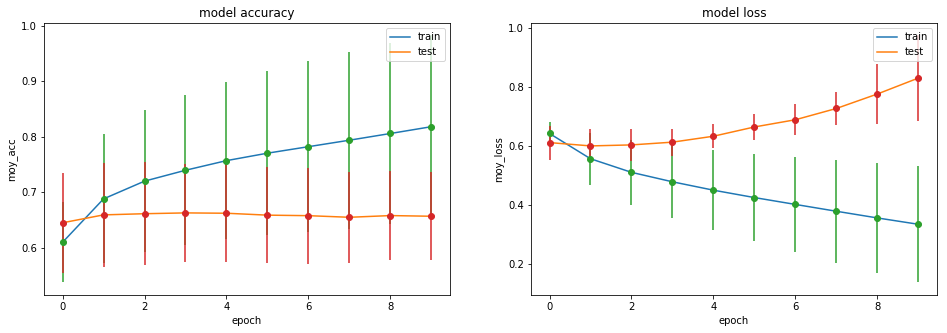

In [175]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_1_history['moy_acc'])
ax1.plot(model_glove_not_train_1_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_1_history['moy_acc'], yerr= model_glove_not_train_1_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_1_history['moy_val_acc'], yerr= model_glove_not_train_1_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_1_history['moy_loss'])
ax2.plot(model_glove_not_train_1_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_1_history['moy_loss'], yerr= model_glove_not_train_1_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_1_history['moy_val_loss'], yerr= model_glove_not_train_1_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [176]:
K.clear_session()

In [140]:
model_not_trainable1 = Sequential()
model_not_trainable1.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable1.add(Flatten())
model_not_trainable1.add(Dense(32, activation='relu'))
model_not_trainable1.add(Dense(1, activation='sigmoid'))
model_not_trainable1.summary()

model_not_trainable1.load_weights("weights/model_not_train1_weights-improvement-01-0.72.hdf5")
model_not_trainable1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable1.evaluate(x_test, y_test)

Result :

In [93]:
[0.5492972365760803, 0.72284]

[0.5492972365760803, 0.72284]

### Not trainable with 2 hidden layers

Takes 2.4min per run on average.

#### Train

In [68]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_2_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])

moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [69]:
model_glove_not_train_2_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

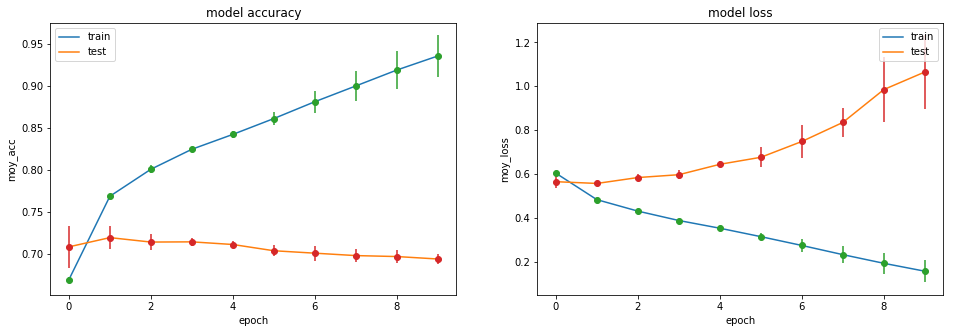

In [11]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_2_history['moy_acc'])
ax1.plot(model_glove_not_train_2_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_2_history['moy_acc'], yerr= model_glove_not_train_2_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_2_history['moy_val_acc'], yerr= model_glove_not_train_2_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_2_history['moy_loss'])
ax2.plot(model_glove_not_train_2_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_2_history['moy_loss'], yerr= model_glove_not_train_2_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_2_history['moy_val_loss'], yerr= model_glove_not_train_2_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [94]:
model_not_trainable2 = Sequential()
model_not_trainable2.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable2.add(Flatten())
model_not_trainable2.add(Dense(32, activation='relu'))
model_not_trainable2.add(Dense(16, activation='relu'))
model_not_trainable2.add(Dense(1, activation='sigmoid'))
model_not_trainable2.summary()

model_not_trainable2.load_weights("weights/model_not_train2_weights-improvement-03-0.71.hdf5")
model_not_trainable2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 1,320,577
Trainable params: 320,577
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable2.evaluate(x_test, y_test)

Result :

In [95]:
[0.5703566848182678, 0.7196]

[0.5703566848182678, 0.7196]

### Not trainable with 3 hidden layers

Takes 2.5min per run on average.

#### Train

In [70]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
   
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [71]:
model_glove_not_train_3_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

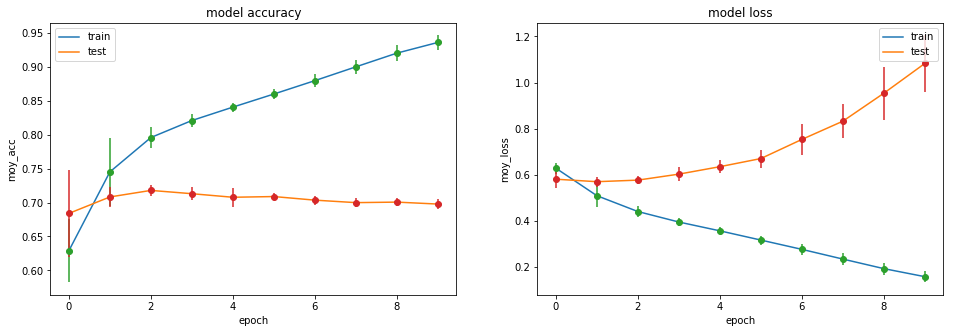

In [21]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_history['moy_acc'])
ax1.plot(model_glove_not_train_3_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_history['moy_acc'], yerr= model_glove_not_train_3_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_history['moy_val_acc'], yerr= model_glove_not_train_3_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_history['moy_loss'])
ax2.plot(model_glove_not_train_3_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_history['moy_loss'], yerr= model_glove_not_train_3_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_history['moy_val_loss'], yerr= model_glove_not_train_3_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [96]:
model_not_trainable3 = Sequential()
model_not_trainable3.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3.add(Flatten())
model_not_trainable3.add(Dense(32, activation='relu'))
model_not_trainable3.add(Dense(16, activation='relu'))
model_not_trainable3.add(Dense(8, activation='relu'))
model_not_trainable3.add(Dense(1, activation='sigmoid'))
model_not_trainable3.summary()

model_not_trainable3.load_weights("weights/model_not_train3_weights-improvement-07-0.71.hdf5")
model_not_trainable3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 1,320,705
Trainable params: 320,705
Non-trainable params: 1,000,000
____________________________________________________________

In [ ]:
model_not_trainable3.evaluate(x_test, y_test)

Result :

In [97]:
[0.5450593916702271, 0.718]

[0.5450593916702271, 0.718]

### Not trainable with 4 hidden layers

Takes 23min per run on average.

#### Train

In [72]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_4_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])

moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [73]:
model_glove_not_train_4_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

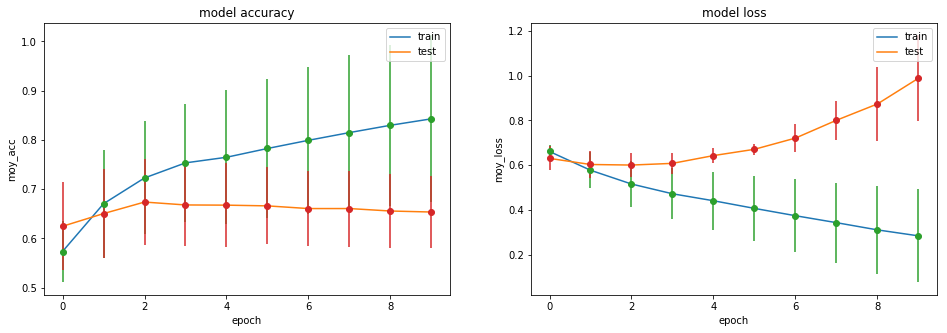

In [19]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_4_history['moy_acc'])
ax1.plot(model_glove_not_train_4_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_4_history['moy_acc'], yerr= model_glove_not_train_4_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_4_history['moy_val_acc'], yerr= model_glove_not_train_4_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_4_history['moy_loss'])
ax2.plot(model_glove_not_train_4_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_4_history['moy_loss'], yerr= model_glove_not_train_4_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_4_history['moy_val_loss'], yerr= model_glove_not_train_4_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [98]:
model_not_trainable4 = Sequential()
model_not_trainable4.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable4.add(Flatten())
model_not_trainable4.add(Dense(32, activation='relu'))
model_not_trainable4.add(Dense(16, activation='relu'))
model_not_trainable4.add(Dense(8, activation='relu'))
model_not_trainable4.add(Dense(4, activation='relu'))
model_not_trainable4.add(Dense(1, activation='sigmoid'))
model_not_trainable4.summary()

model_not_trainable4.load_weights("weights/model_not_train4_weights-improvement-10-0.50.hdf5")
model_not_trainable4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total para

In [ ]:
model_not_trainable4.evaluate(x_test, y_test)

Result :

In [99]:
[0.6931477781486511, 0.5]

[0.6931477781486511, 0.5]

### Trainable with 3 hidden layers

Takes 3min per run on average.

#### Train

In [76]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_train_3_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])

moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [77]:
model_glove_train_3_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

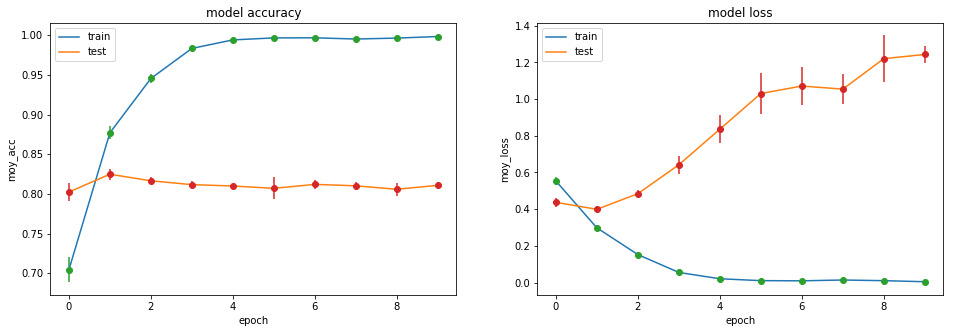

In [22]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_train_3_history['moy_acc'])
ax1.plot(model_glove_train_3_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_train_3_history['moy_acc'], yerr= model_glove_train_3_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_train_3_history['moy_val_acc'], yerr= model_glove_train_3_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_train_3_history['moy_loss'])
ax2.plot(model_glove_train_3_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_train_3_history['moy_loss'], yerr= model_glove_train_3_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_train_3_history['moy_val_loss'], yerr= model_glove_train_3_history['std_val_loss'], fmt='o')

plt.show()

In [23]:
diff_acc = []
diff_loss = []
 
for k in range(10) :
    with open("history/model_glove_train_3_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    diff_acc.append(list (np.array(one_run['acc']) - np.array(one_run['val_acc'])))
    diff_loss.append(list (np.array(one_run['loss']) - np.array(one_run['val_loss'])))

moy_diff_acc = np.mean(diff_acc, axis = 0)
moy_diff_loss = np.mean(diff_loss, axis = 0)

std_diff_acc = np.std(diff_acc, axis = 0)
std_diff_loss = np.std(diff_loss, axis = 0)

In [24]:
evolution = {'moy_diff_acc' : moy_diff_acc, 'moy_diff_loss' : moy_diff_loss, 'std_diff_acc' : std_diff_acc, 'std_diff_loss' : std_diff_loss}

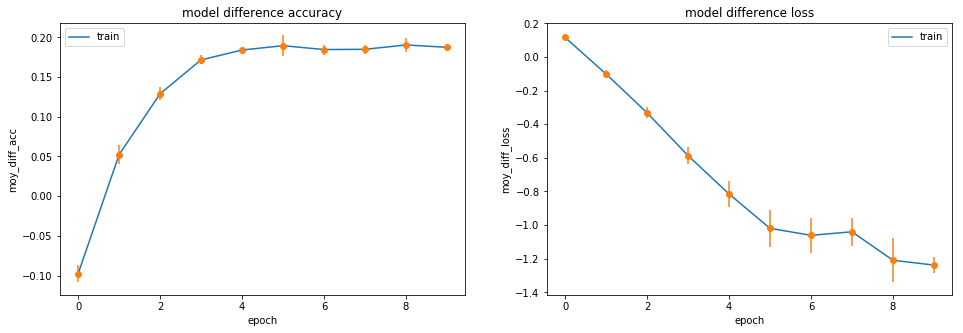

In [25]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(evolution['moy_diff_acc'])
ax1.set(title = 'model difference accuracy', ylabel = 'moy_diff_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), evolution['moy_diff_acc'], yerr= evolution['std_diff_acc'], fmt='o')

ax2.plot(evolution['moy_diff_loss'])
ax2.set(title = 'model difference loss', ylabel = 'moy_diff_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), evolution['moy_diff_loss'], yerr= evolution['std_diff_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [100]:
model_trainable3 = Sequential()
model_trainable3.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = True))
model_trainable3.add(Flatten())
model_trainable3.add(Dense(32, activation='relu'))
model_trainable3.add(Dense(16, activation='relu'))
model_trainable3.add(Dense(8, activation='relu'))
model_trainable3.add(Dense(1, activation='sigmoid'))
model_trainable3.summary()

model_trainable3.load_weights("weights/model_train3_weights-improvement-02-0.83.hdf5")
model_trainable3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 1,320,705
Trainable params: 1,320,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_trainable3.evaluate(x_test,y_test)

Result :

In [101]:
[0.3982468561267853, 0.82556]

[0.3982468561267853, 0.82556]

### Trainable with 3 hidden layers and a dropout

Takes 9min per run on average.

#### Train

In [78]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_train_3_dropout_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [79]:
model_glove_train_3_dropout_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

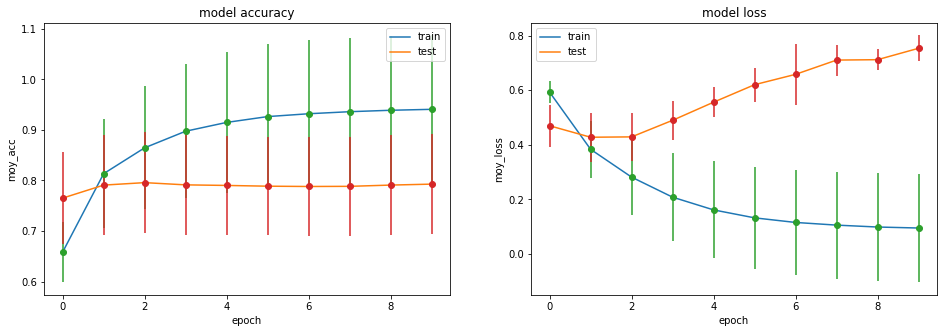

In [28]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_train_3_dropout_history['moy_acc'])
ax1.plot(model_glove_train_3_dropout_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_train_3_dropout_history['moy_acc'], yerr= model_glove_train_3_dropout_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_train_3_dropout_history['moy_val_acc'], yerr= model_glove_train_3_dropout_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_train_3_dropout_history['moy_loss'])
ax2.plot(model_glove_train_3_dropout_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_train_3_dropout_history['moy_loss'], yerr= model_glove_train_3_dropout_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_train_3_dropout_history['moy_val_loss'], yerr= model_glove_train_3_dropout_history['std_val_loss'], fmt='o')

plt.show()

In [30]:
diff_acc = []
diff_loss = []
 
for k in range(10) :
    with open("history/model_glove_train_3_dropout_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    diff_acc.append(list (np.array(one_run['acc']) - np.array(one_run['val_acc'])))
    diff_loss.append(list (np.array(one_run['loss']) - np.array(one_run['val_loss'])))

moy_diff_acc = np.mean(diff_acc, axis = 0)
moy_diff_loss = np.mean(diff_loss, axis = 0)

std_diff_acc = np.std(diff_acc, axis = 0)
std_diff_loss = np.std(diff_loss, axis = 0)

In [31]:
evolution = {'moy_diff_acc' : moy_diff_acc, 'moy_diff_loss' : moy_diff_loss, 'std_diff_acc' : std_diff_acc, 'std_diff_loss' : std_diff_loss}

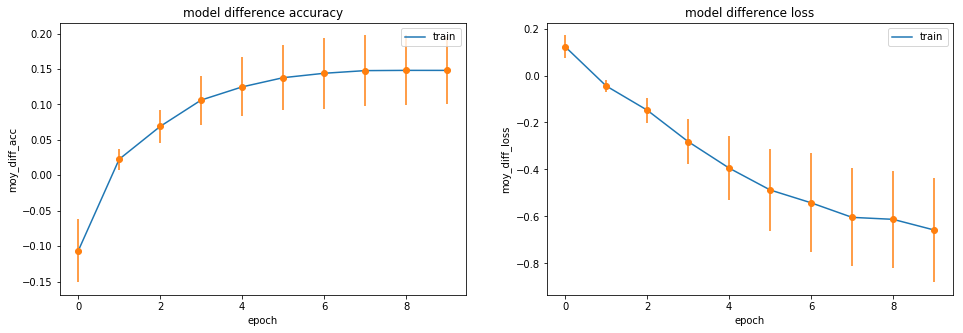

In [32]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(evolution['moy_diff_acc'])
ax1.set(title = 'model difference accuracy', ylabel = 'moy_diff_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), evolution['moy_diff_acc'], yerr= evolution['std_diff_acc'], fmt='o')

ax2.plot(evolution['moy_diff_loss'])
ax2.set(title = 'model difference loss', ylabel = 'moy_diff_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), evolution['moy_diff_loss'], yerr= evolution['std_diff_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [102]:
model_trainable3_dropout = Sequential()
model_trainable3_dropout.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = True))
model_trainable3_dropout.add(Dropout(0.25))
model_trainable3_dropout.add(Flatten())
model_trainable3_dropout.add(Dense(32, activation='relu'))
model_trainable3_dropout.add(Dense(16, activation='relu'))
model_trainable3_dropout.add(Dense(8, activation='relu'))
model_trainable3_dropout.add(Dense(1, activation='sigmoid'))
model_trainable3_dropout.summary()

model_trainable3_dropout.load_weights("weights/model_train3_dropout_weights-improvement-04-0.83.hdf5")
model_trainable3_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 136       
___________________________

In [ ]:
model_trainable3_dropout.evaluate(x_test,y_test)

Result :

In [103]:
[0.47224189556121826, 0.82804]

[0.47224189556121826, 0.82804]

### Not trainable with LSTM (50)

Takes 36min per run on average.

#### Train

In [80]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_lstm_50_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [81]:
model_glove_not_train_3_lstm_50_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

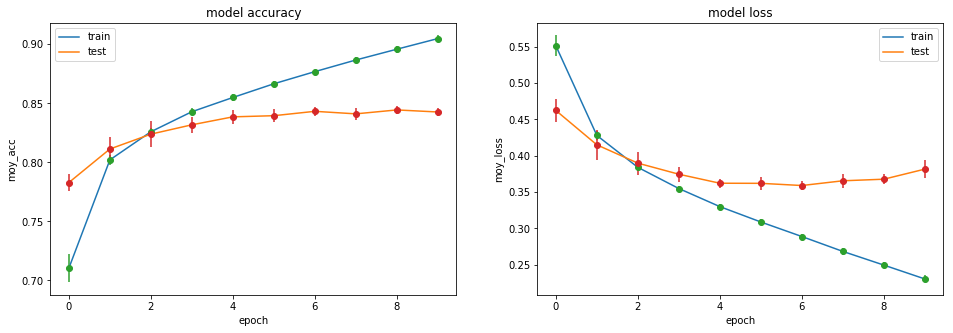

In [36]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_lstm_50_history['moy_acc'])
ax1.plot(model_glove_not_train_3_lstm_50_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_lstm_50_history['moy_acc'], yerr= model_glove_not_train_3_lstm_50_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_lstm_50_history['moy_val_acc'], yerr= model_glove_not_train_3_lstm_50_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_lstm_50_history['moy_loss'])
ax2.plot(model_glove_not_train_3_lstm_50_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_lstm_50_history['moy_loss'], yerr= model_glove_not_train_3_lstm_50_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_lstm_50_history['moy_val_loss'], yerr= model_glove_not_train_3_lstm_50_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [104]:
model_not_trainable_3_lstm_50 = Sequential()
model_not_trainable_3_lstm_50.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable_3_lstm_50.add(LSTM(50))
model_not_trainable_3_lstm_50.add(Dense(1, activation='sigmoid')) 
model_not_trainable_3_lstm_50.summary()

model_not_trainable_3_lstm_50.load_weights("weights/model_not_train3_lstm_50_weights-improvement-10-0.85.hdf5")
model_not_trainable_3_lstm_50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 1,030,251
Trainable params: 30,251
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable_3_lstm_50.evaluate(x_test, y_test)

Result :

In [105]:
[0.3745393134832382, 0.85048]

[0.3745393134832382, 0.85048]

### Not trainable with LSTM (100)

Takes 46min per run on average.

#### Train

In [82]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_lstm_100_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [83]:
model_glove_not_train_3_lstm_100_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

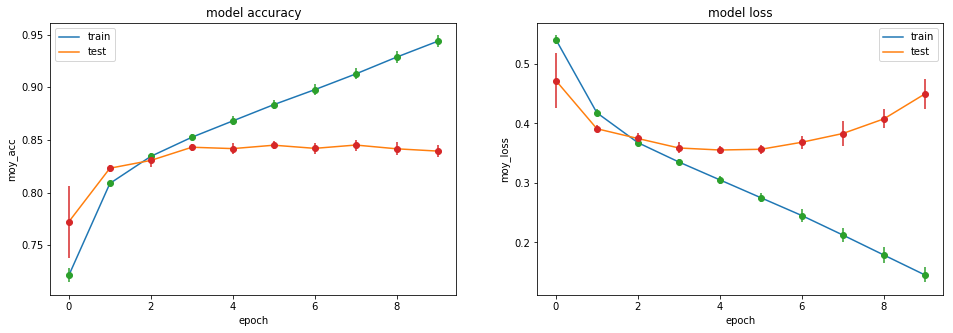

In [84]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_lstm_100_history['moy_acc'])
ax1.plot(model_glove_not_train_3_lstm_100_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_history['moy_acc'], yerr= model_glove_not_train_3_lstm_100_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_history['moy_val_acc'], yerr= model_glove_not_train_3_lstm_100_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_lstm_100_history['moy_loss'])
ax2.plot(model_glove_not_train_3_lstm_100_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_history['moy_loss'], yerr= model_glove_not_train_3_lstm_100_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_history['moy_val_loss'], yerr= model_glove_not_train_3_lstm_100_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [106]:
model_not_trainable_3_lstm_100 = Sequential()
model_not_trainable_3_lstm_100.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable_3_lstm_100.add(LSTM(100))
model_not_trainable_3_lstm_100.add(Dense(1, activation='sigmoid')) 
model_not_trainable_3_lstm_100.summary()

model_not_trainable_3_lstm_100.load_weights("weights/model_not_train3_lstm_100_weights-improvement-06-0.85.hdf5")
model_not_trainable_3_lstm_100.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 80,501
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable_3_lstm_100.evaluate(x_test, y_test)

Result :

In [107]:
[0.35622239056348803, 0.84796]

[0.35622239056348803, 0.84796]

### Not trainable with LSTM (50) and 1 hidden layer

Takes 35min per run on average.

#### Train

In [85]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_lstm_50_hidden_1_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [86]:
model_glove_not_train_3_lstm_50_hidden_1_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

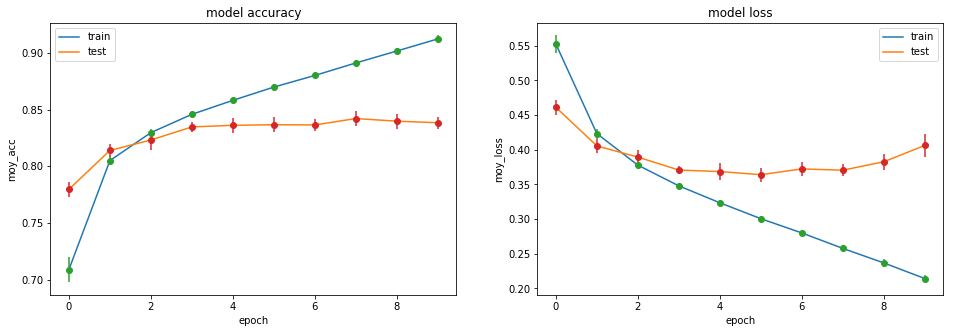

In [87]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_lstm_50_hidden_1_history['moy_acc'])
ax1.plot(model_glove_not_train_3_lstm_50_hidden_1_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_lstm_50_hidden_1_history['moy_acc'], yerr= model_glove_not_train_3_lstm_50_hidden_1_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_lstm_50_hidden_1_history['moy_val_acc'], yerr= model_glove_not_train_3_lstm_50_hidden_1_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_lstm_50_hidden_1_history['moy_loss'])
ax2.plot(model_glove_not_train_3_lstm_50_hidden_1_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_lstm_50_hidden_1_history['moy_loss'], yerr= model_glove_not_train_3_lstm_50_hidden_1_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_lstm_50_hidden_1_history['moy_val_loss'], yerr= model_glove_not_train_3_lstm_50_hidden_1_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [108]:
model_not_trainable3_lstm_50_hidden_1 = Sequential()
model_not_trainable3_lstm_50_hidden_1.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_lstm_50_hidden_1.add(LSTM(50))
model_not_trainable3_lstm_50_hidden_1.add(Dense(32, activation='relu'))
model_not_trainable3_lstm_50_hidden_1.add(Dense(1, activation='sigmoid')) 
model_not_trainable3_lstm_50_hidden_1.summary()

model_not_trainable3_lstm_50_hidden_1.load_weights("weights/model_not_train3_lstm_50_hidden_1_weights-improvement-06-0.85.hdf5")
model_not_trainable3_lstm_50_hidden_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 1,031,865
Trainable params: 31,865
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable3_lstm_50_hidden_1.evaluate(x_test, y_test)

Result :

In [109]:
[0.3441666315174103, 0.84612]

[0.3441666315174103, 0.84612]

### Not trainable with LSTM (100) and 1 hidden layer

Takes 50min per run on average.

#### Train

In [88]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_lstm_100_hidden_1_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [89]:
model_glove_not_train_3_lstm_100_hidden_1_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

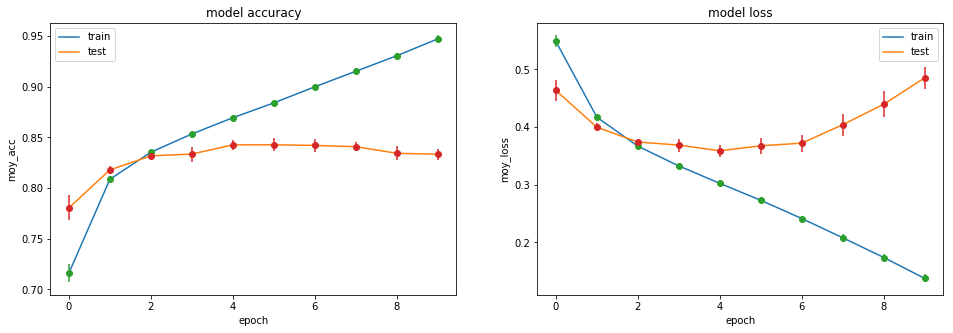

In [90]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_lstm_100_hidden_1_history['moy_acc'])
ax1.plot(model_glove_not_train_3_lstm_100_hidden_1_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_hidden_1_history['moy_acc'], yerr= model_glove_not_train_3_lstm_100_hidden_1_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_hidden_1_history['moy_val_acc'], yerr= model_glove_not_train_3_lstm_100_hidden_1_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_lstm_100_hidden_1_history['moy_loss'])
ax2.plot(model_glove_not_train_3_lstm_100_hidden_1_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_hidden_1_history['moy_loss'], yerr= model_glove_not_train_3_lstm_100_hidden_1_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_hidden_1_history['moy_val_loss'], yerr= model_glove_not_train_3_lstm_100_hidden_1_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [110]:
model_not_trainable3_lstm_100_hidden_1 = Sequential()
model_not_trainable3_lstm_100_hidden_1.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_lstm_100_hidden_1.add(LSTM(100))
model_not_trainable3_lstm_100_hidden_1.add(Dense(32, activation='relu'))
model_not_trainable3_lstm_100_hidden_1.add(Dense(1, activation='sigmoid')) 
model_not_trainable3_lstm_100_hidden_1.summary()

model_not_trainable3_lstm_100_hidden_1.load_weights("weights/model_not_train3_lstm_100_hidden_1_weights-improvement-09-0.85.hdf5")
model_not_trainable3_lstm_100_hidden_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 1,083,665
Trainable params: 83,665
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable3_lstm_100_hidden_1.evaluate(x_test, y_test)

Result :

In [111]:
[0.42167018109321597, 0.84712]

[0.42167018109321597, 0.84712]

### Not trainable with Bidirectional LSTM (50)

Takes 1h08 per run on average.

#### Train

In [91]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_bilstm_50_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [92]:
model_glove_not_train_3_bilstm_50_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

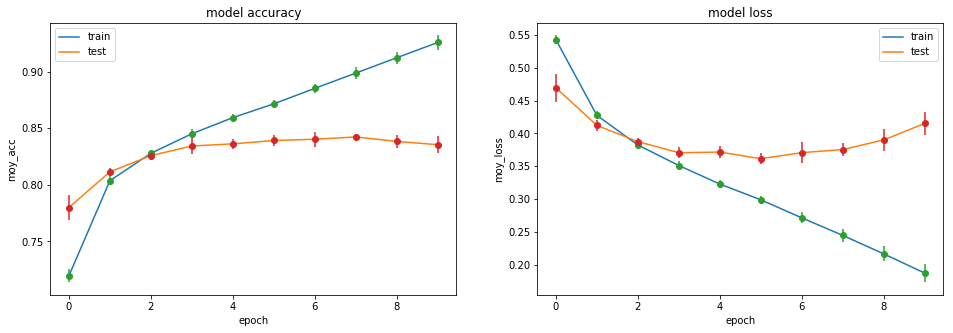

In [93]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_bilstm_50_history['moy_acc'])
ax1.plot(model_glove_not_train_3_bilstm_50_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_bilstm_50_history['moy_acc'], yerr= model_glove_not_train_3_bilstm_50_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_bilstm_50_history['moy_val_acc'], yerr= model_glove_not_train_3_bilstm_50_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_bilstm_50_history['moy_loss'])
ax2.plot(model_glove_not_train_3_bilstm_50_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_bilstm_50_history['moy_loss'], yerr= model_glove_not_train_3_bilstm_50_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_bilstm_50_history['moy_val_loss'], yerr= model_glove_not_train_3_bilstm_50_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [112]:
model_not_trainable3_bilstm_50 = Sequential()
model_not_trainable3_bilstm_50.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_bilstm_50.add(Bidirectional(LSTM(50)))
model_not_trainable3_bilstm_50.add(Dense(1, activation='sigmoid'))
model_not_trainable3_bilstm_50.summary()

model_not_trainable3_bilstm_50.load_weights("weights/model_not_train3_bilstm_50_weights-improvement-09-0.85.hdf5")
model_not_trainable3_bilstm_50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 1,060,501
Trainable params: 60,501
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable3_bilstm_50.evaluate(x_test, y_test)

Result :

In [113]:
[0.38188015057086944, 0.84544]

[0.38188015057086944, 0.84544]

### Not trainable with Bidirectional LSTM (100)

Takes too much time to execut.

First results :

In [ ]:
acc = [0.7099, 0.8086, 0.8411, 0.8602, 0.8780, 0.8959, 0.9133, 0.9334, 0.9530, 0.9696]
val_acc = [0.7878, 0.8200, 0.8294, 0.8272, 0.8408, 0.8404, 0.8332, 0.8374, 0.8298, 0.8254]

### Not trainable with CNN and LSTM (100) 

Takes 20min per run on average.

#### Train

In [94]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_lstm_100_cnn_1_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [95]:
model_glove_not_train_3_lstm_100_cnn_1_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

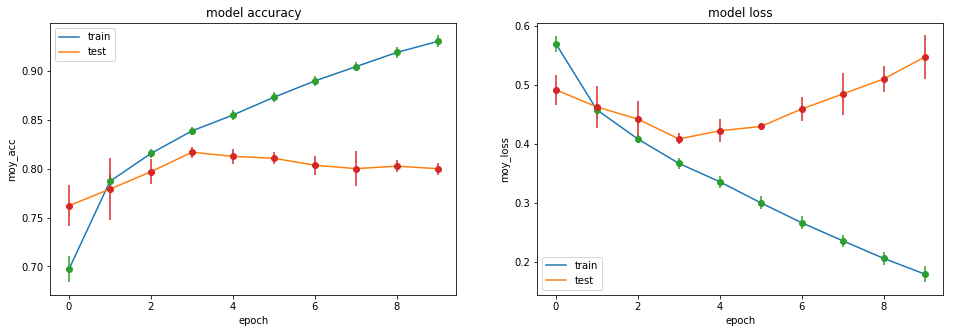

In [96]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_lstm_100_cnn_1_history['moy_acc'])
ax1.plot(model_glove_not_train_3_lstm_100_cnn_1_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_cnn_1_history['moy_acc'], yerr= model_glove_not_train_3_lstm_100_cnn_1_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_lstm_100_cnn_1_history['moy_val_acc'], yerr= model_glove_not_train_3_lstm_100_cnn_1_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_lstm_100_cnn_1_history['moy_loss'])
ax2.plot(model_glove_not_train_3_lstm_100_cnn_1_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_cnn_1_history['moy_loss'], yerr= model_glove_not_train_3_lstm_100_cnn_1_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_lstm_100_cnn_1_history['moy_val_loss'], yerr= model_glove_not_train_3_lstm_100_cnn_1_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [114]:
model_not_trainable3_cnn_lstm_100 = Sequential()
model_not_trainable3_cnn_lstm_100.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_cnn_lstm_100.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_not_trainable3_cnn_lstm_100.add(MaxPooling1D(pool_size=2))
model_not_trainable3_cnn_lstm_100.add(LSTM(100))
model_not_trainable3_cnn_lstm_100.add(Dense(1, activation='sigmoid')) 
model_not_trainable3_cnn_lstm_100.summary()

model_not_trainable3_cnn_lstm_100.load_weights("weights/model_not_train3_lstm_100_cnn_weights-improvement-04-0.82.hdf5")
model_not_trainable3_cnn_lstm_100.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 93, 32)            25632     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 46, 32)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 1,078,933
Trainable params: 78,933
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model_not_trainable3_cnn_lstm_100.evaluate(x_test, y_test)

Result :

In [115]:
[0.3978750933456421, 0.8204]

[0.3978750933456421, 0.8204]

### Not trainable with LSTM (50) and CNN and Attention NN

Takes 1h18min per run on average.

#### Train

In [97]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_attention_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [98]:
model_glove_not_train_3_attention_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

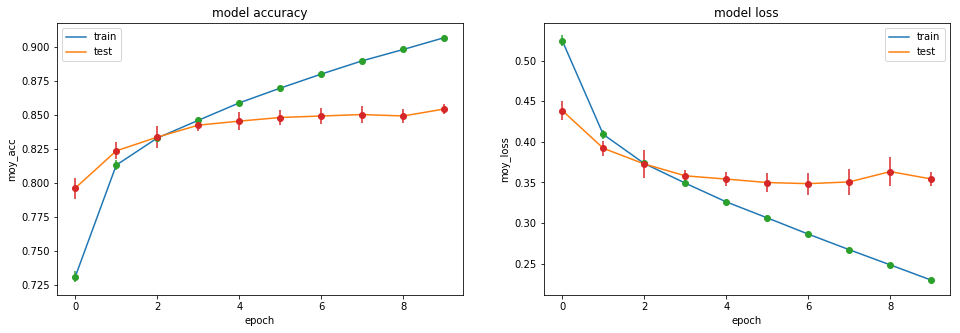

In [99]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_attention_history['moy_acc'])
ax1.plot(model_glove_not_train_3_attention_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_attention_history['moy_acc'], yerr= model_glove_not_train_3_attention_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_attention_history['moy_val_acc'], yerr= model_glove_not_train_3_attention_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_attention_history['moy_loss'])
ax2.plot(model_glove_not_train_3_attention_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_attention_history['moy_loss'], yerr= model_glove_not_train_3_attention_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_attention_history['moy_val_loss'], yerr= model_glove_not_train_3_attention_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [116]:
model_not_trainable3_lstm_50_cnn_attention = Sequential()
model_not_trainable3_lstm_50_cnn_attention.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_lstm_50_cnn_attention.add(LSTM(50, return_sequences = True))
model_not_trainable3_lstm_50_cnn_attention.add(SeqSelfAttention(attention_activation = 'sigmoid'))
model_not_trainable3_lstm_50_cnn_attention.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_not_trainable3_lstm_50_cnn_attention.add(MaxPooling1D(pool_size=2))
#model_not_trainable3_lstm_50_cnn_attention.add(LSTM(50))
model_not_trainable3_lstm_50_cnn_attention.add(Dense(1))
model_not_trainable3_lstm_50_cnn_attention.add(Flatten())
model_not_trainable3_lstm_50_cnn_attention.add(Dense(1, activation='sigmoid'))
model_not_trainable3_lstm_50_cnn_attention.summary()

model_not_trainable3_lstm_50_cnn_attention.load_weights("weights/model_not_train3_lstm_50_cnn_attention_weights-improvement-08-0.86.hdf5")
#model_not_trainable3_lstm_50_cnn_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
seq_self_attention_3 (SeqSel (None, 100, 50)           3265      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 93, 32)            12832     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 46, 32)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 46, 1)             33        
_________________________________________________________________
flatten_9 (Flatten)          (None, 46)                0         
__________

In [ ]:
model_not_trainable3_lstm_50_cnn_attention.evaluate(x_test, y_test)

Result :

In [117]:
[0.3281531894993782, 0.85704]

[0.3281531894993782, 0.85704]

### Not trainable with LSTM (50) and Attention NN

Takes 1h20min per run on average.

#### Train

In [100]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_not_train_3_no_cnn_attention_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [101]:
model_glove_not_train_3_no_cnn_attention_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

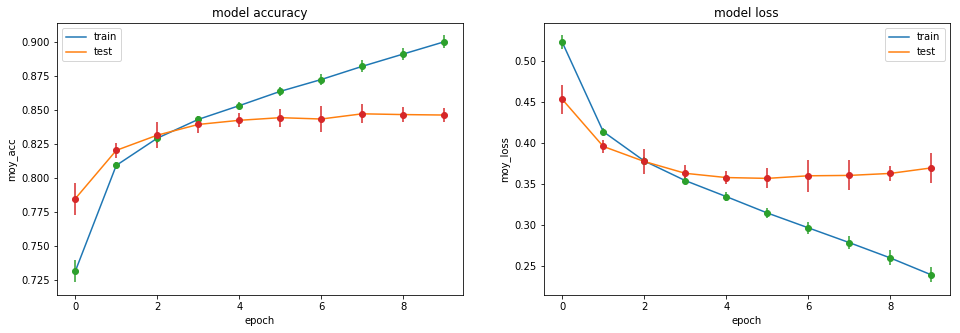

In [102]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_not_train_3_no_cnn_attention_history['moy_acc'])
ax1.plot(model_glove_not_train_3_no_cnn_attention_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_not_train_3_no_cnn_attention_history['moy_acc'], yerr= model_glove_not_train_3_no_cnn_attention_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_not_train_3_no_cnn_attention_history['moy_val_acc'], yerr= model_glove_not_train_3_no_cnn_attention_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_not_train_3_no_cnn_attention_history['moy_loss'])
ax2.plot(model_glove_not_train_3_no_cnn_attention_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_not_train_3_no_cnn_attention_history['moy_loss'], yerr= model_glove_not_train_3_no_cnn_attention_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_not_train_3_no_cnn_attention_history['moy_val_loss'], yerr= model_glove_not_train_3_no_cnn_attention_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [118]:
model_not_trainable3_lstm_50_cnn = Sequential()
model_not_trainable3_lstm_50_cnn.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_lstm_50_cnn.add(LSTM(50, return_sequences = True))
model_not_trainable3_lstm_50_cnn.add(SeqSelfAttention(attention_activation = 'sigmoid'))
#model_not_trainable3_lstm_50_cnn.add(LSTM(50))
model_not_trainable3_lstm_50_cnn.add(Dense(1))
model_not_trainable3_lstm_50_cnn.add(Flatten())
model_not_trainable3_lstm_50_cnn.add(Dense(1, activation='sigmoid'))
model_not_trainable3_lstm_50_cnn.summary()

model_not_trainable3_lstm_50_cnn.load_weights("weights/model_not_train3_lstm_50_attention_weights-improvement-10-0.85.hdf5")
model_not_trainable3_lstm_50_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
seq_self_attention_4 (SeqSel (None, 100, 50)           3265      
_________________________________________________________________
dense_37 (Dense)             (None, 100, 1)            51        
_________________________________________________________________
flatten_10 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 101       
Total params: 1,033,617
Trainable params: 33,617
Non-trainable params: 1,000,000
_____________________________________________________________

In [ ]:
model_not_trainable3_lstm_50_cnn.evaluate(x_test, y_test)

Result :

In [119]:
[0.35582557824611666, 0.84984]

[0.35582557824611666, 0.84984]

### Trainable with LSTM (50) and CNN and Attention NN

Takes 1h34min per run on average.

#### Train

In [104]:
acc = []
val_acc = []
loss = []
val_loss = []
 
for k in range(10) :
    with open("history/model_glove_train_3_attention_history{}.pkl".format(k),"rb") as f:
        one_run = pickle.load(f)
    acc.append(one_run['acc'])
    val_acc.append(one_run['val_acc'])
    loss.append(one_run['loss'])
    val_loss.append(one_run['val_loss'])
    
moy_acc = np.mean(acc, axis = 0)
moy_val_acc = np.mean(val_acc, axis = 0)
moy_loss = np.mean(loss, axis = 0)
moy_val_loss = np.mean(val_loss, axis = 0)

std_acc = np.std(acc, axis = 0)
std_val_acc = np.std(val_acc, axis = 0)
std_loss = np.std(loss, axis = 0)
std_val_loss = np.std(val_loss, axis = 0)

In [105]:
model_glove_train_3_lstm_50_cnn_attention_history = {'moy_acc' : moy_acc, 'moy_val_acc' : moy_val_acc, 'moy_loss' : moy_loss, 'moy_val_loss' : moy_val_loss, 'std_acc' : std_acc, 'std_val_acc' : std_val_acc, 'std_loss' : std_loss, 'std_val_loss' : std_val_loss}

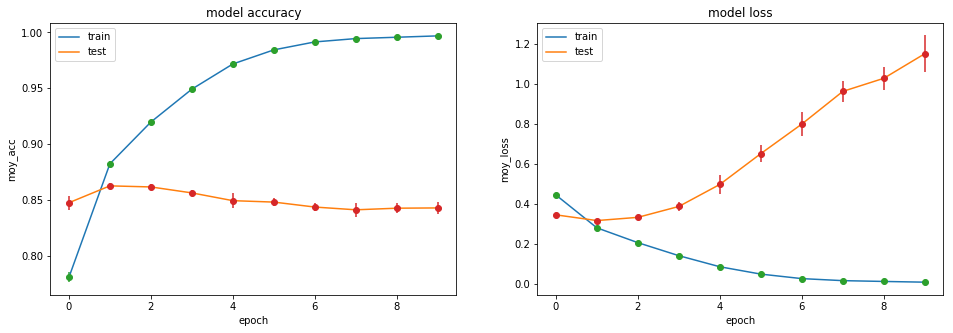

In [106]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.plot(model_glove_train_3_lstm_50_cnn_attention_history['moy_acc'])
ax1.plot(model_glove_train_3_lstm_50_cnn_attention_history['moy_val_acc'])
ax1.set(title = 'model accuracy', ylabel = 'moy_acc', xlabel = 'epoch')
ax1.legend(['train', 'test'])
ax1.errorbar(range(10), model_glove_train_3_lstm_50_cnn_attention_history['moy_acc'], yerr= model_glove_train_3_lstm_50_cnn_attention_history['std_acc'], fmt='o')
ax1.errorbar(range(10), model_glove_train_3_lstm_50_cnn_attention_history['moy_val_acc'], yerr= model_glove_train_3_lstm_50_cnn_attention_history['std_val_acc'], fmt='o')

ax2.plot(model_glove_train_3_lstm_50_cnn_attention_history['moy_loss'])
ax2.plot(model_glove_train_3_lstm_50_cnn_attention_history['moy_val_loss'])
ax2.set(title = 'model loss', ylabel = 'moy_loss', xlabel = 'epoch')
ax2.legend(['train', 'test'])
ax2.errorbar(range(10), model_glove_train_3_lstm_50_cnn_attention_history['moy_loss'], yerr= model_glove_train_3_lstm_50_cnn_attention_history['std_loss'], fmt='o')
ax2.errorbar(range(10), model_glove_train_3_lstm_50_cnn_attention_history['moy_val_loss'], yerr= model_glove_train_3_lstm_50_cnn_attention_history['std_val_loss'], fmt='o')

plt.show()

#### Test

In [ ]:
K.clear_session()

In [71]:
model_trainable3_lstm_50_cnn_attention = Sequential()
model_trainable3_lstm_50_cnn_attention.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = True))
model_trainable3_lstm_50_cnn_attention.add(LSTM(50, return_sequences = True))
model_trainable3_lstm_50_cnn_attention.add(SeqSelfAttention(attention_activation = 'sigmoid'))
model_trainable3_lstm_50_cnn_attention.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_trainable3_lstm_50_cnn_attention.add(MaxPooling1D(pool_size=2))
#model_trainable3_lstm_50_cnn_attention.add(LSTM(50))
model_trainable3_lstm_50_cnn_attention.add(Dense(1))
model_trainable3_lstm_50_cnn_attention.add(Flatten())
model_trainable3_lstm_50_cnn_attention.add(Dense(1, activation='sigmoid'))
model_trainable3_lstm_50_cnn_attention.summary()

model_trainable3_lstm_50_cnn_attention.load_weights("weights/model_train3_lstm_50_cnn_attention_weights-improvement-02-0.87.hdf5")
#model_trainable3_lstm_50_cnn_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, 100, 50)           3265      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 32)            12832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 46, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 1)             33        
_________________________________________________________________
flat

In [ ]:
model_trainable3_lstm_50_cnn_attention.evaluate(x_test, y_test)

Result :

In [120]:
[0.32128008213043213, 0.86416]

[0.32128008213043213, 0.86416]

### Comparison

#### Train

In [107]:
models = [model_glove_not_train_1_history, model_glove_not_train_2_history, model_glove_not_train_3_history, model_glove_not_train_4_history, model_glove_train_3_history, model_glove_train_3_dropout_history, model_glove_not_train_3_lstm_50_history, model_glove_not_train_3_lstm_100_history, model_glove_not_train_3_lstm_50_hidden_1_history, model_glove_not_train_3_lstm_100_hidden_1_history, model_glove_not_train_3_bilstm_50_history, model_glove_not_train_3_lstm_100_cnn_1_history, model_glove_not_train_3_attention_history, model_glove_not_train_3_no_cnn_attention_history, model_glove_train_3_lstm_50_cnn_attention_history]
labels = ['1 hidden layer', '2 hidden layers', '3 hidden layers', '4 hidden layers', 'trainable + 3 hidden', 'trainable + 3 hidden + dropout', 'lstm 50', 'lstm 100', 'lstm 50 + 1 hidden', 'lstm 100 + 1 hidden', 'bilstm 50', 'cnn + lstm 100', 'lstm 50 + cnn + attention', 'lstm 50 + attention', 'trainable + lstm 50 + cnn + attention']

In [110]:
palette = plt.cm.get_cmap('tab20')

15

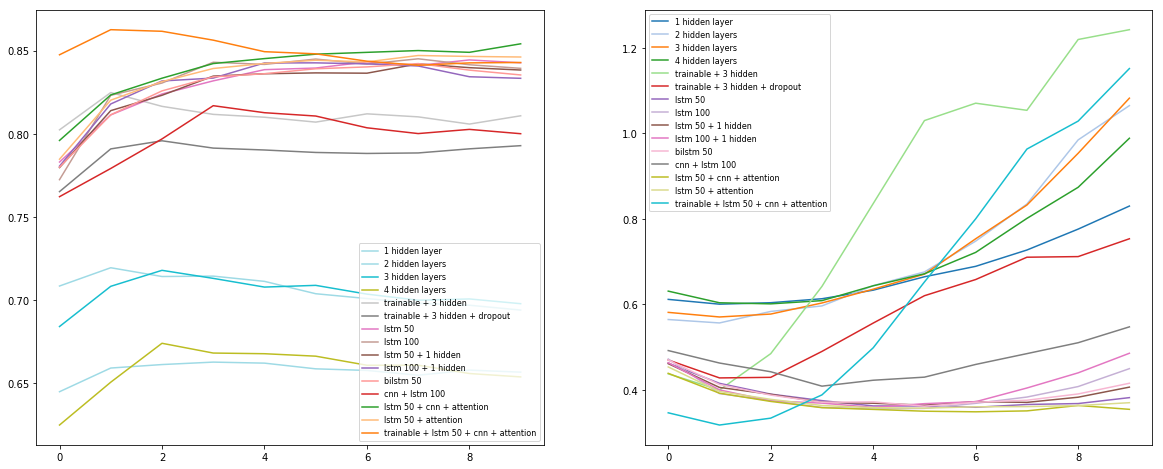

In [119]:
im, (ax1,ax2) = plt.subplots(1,2, figsize = (20,8))
for i, model in enumerate(models) :
    ax1.plot(model['moy_val_acc'], label = labels[i], color = palette(20-(i*20)//len(models)))
    ax2.plot(model['moy_val_loss'], label = labels[i], color = palette((i*20)//len(models)))
    #ax1.errorbar(range(10), model['moy_val_acc'], yerr= model['std_val_acc'], fmt='o')
ax1.legend(loc = 'lower right',  prop={'size': 8})
ax2.legend(loc = 'upper left', prop={'size': 8})
plt.show()

#### Test

In [134]:
ar = np.array([[2, 0, 0, 0, 0, 0, 1.7, 0.5492972365760803, 0.72284, 320065], [3, 0, 0, 0, 0, 0, 2.4, 0.5703566848182678, 0.7196, 320577], [4, 0, 0, 0, 0, 0, 2.5, 0.5450593916702271, 0.718, 320705], [5, 0, 0, 0, 0, 0, 23, 0.6931477781486511, 0.5, 320737], [4, 0, 0, 0, 0, 0, 3, 0.3982468561267853, 0.82556, 1320705], [4, 1, 0, 0, 0, 0, 9, 0.47224189556121826, 0.82804, 1320705], [1, 0, 1, 0, 0, 0, 36, 0.3745393134832382, 0.85048, 30251], [1, 0, 1, 0, 0, 0, 46, 0.35622239056348803, 0.84796, 80501], [2, 0, 1, 0, 0, 0, 35, 0.3441666315174103, 0.84612, 31865], [2, 0, 1, 0, 0, 0, 50, 0.42167018109321597, 0.84712, 83665], [1, 0, 0, 1, 0, 0, 68, 0.38188015057086944, 0.84544, 60501]])
df1 = pd.DataFrame(ar, index = ['Not trainable 1 hidden layer', 'Not trainable 2 hidden layers', 'Not trainable 3 hidden layers', 'Not trainable 4 hidden layers', 'Trainable 3 hidden layers', 'Trainable 3 hidden layers + dropout', 'Not trainable lstm 50', 'Not trainable lstm 100', 'Not trainable lstm 50 + 1 hidden layer', 'Not trainable lstm 100 + 1 hidden layer', 'Not trainable bilstm 50'], columns = ['Number of dense layer', 'Number of dropout layer', 'Number of lstm layer', 'Number of bilstm layer', 'Number of cnn layer', 'Number of attention layer', 'execution time for 10 epochs (min)', 'loss', 'accuracy', 'Trainable parameters'])
df1

,Number of dense layer,Number of dropout layer,Number of lstm layer,Number of bilstm layer,Number of cnn layer,Number of attention layer,execution time for 10 epochs (min),loss,accuracy,Trainable parameters
Not trainable 1 hidden layer,2.0,0.0,0.0,0.0,0.0,0.0,1.7,0.549297,0.72284,320065.0
Not trainable 2 hidden layers,3.0,0.0,0.0,0.0,0.0,0.0,2.4,0.570357,0.71960,320577.0
Not trainable 3 hidden layers,4.0,0.0,0.0,0.0,0.0,0.0,2.5,0.545059,0.71800,320705.0
Not trainable 4 hidden layers,5.0,0.0,0.0,0.0,0.0,0.0,23.0,0.693148,0.50000,320737.0
Trainable 3 hidden layers,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.398247,0.82556,1320705.0
Trainable 3 hidden layers + dropout,4.0,1.0,0.0,0.0,0.0,0.0,9.0,0.472242,0.82804,1320705.0
Not trainable lstm 50,1.0,0.0,1.0,0.0,0.0,0.0,36.0,0.374539,0.85048,30251.0
Not trainable lstm 100,1.0,0.0,1.0,0.0,0.0,0.0,46.0,0.356222,0.84796,80501.0
Not trainable lstm 50 + 1 hidden layer,2.0,0.0,1.0,0.0,0.0,0.0,35.0,0.344167,0.84612,31865.0
Not trainable lstm 100 + 1 hidden layer,2.0,0.0,1.0,0.0,0.0,0.0,50.0,0.421670,0.84712,83665.0


In [72]:
ar = np.array([[1, 0, 1, 0, 1, 0, 20, 0.3978750933456421, 0.8204, 78933], [2, 0, 1, 0, 1, 1, 78, 0.3281531894993782, 0.85704, 46377], [2, 0, 1, 0, 0, 1, 80, 0.35582557824611666, 0.84984, 33617], [2, 0, 1, 0, 1, 1, 94, 0.32128008213043213, 0.86416, 1046377]])
df2 = pd.DataFrame(ar, index = ['Not trainable cnn + lstm 100', 'Not trainable with lstm 50 + cnn + attention', 'Not trainable with lstm 50 + attention', 'Trainable with lstm 50 + cnn + attention'], columns = ['Number of dense layer', 'Number of dropout layer', 'Number of lstm layer', 'Number of bilstm layer', 'Number of cnn layer', 'Number of attention layer', 'execution time for 10 epochs (min)', 'loss', 'accuracy', 'Trainable parameters'])
df2

,Number of dense layer,Number of dropout layer,Number of lstm layer,Number of bilstm layer,Number of cnn layer,Number of attention layer,execution time for 10 epochs (min),loss,accuracy,Trainable parameters
Not trainable cnn + lstm 100,1.0,0.0,1.0,0.0,1.0,0.0,20.0,0.397875,0.82040,78933.0
Not trainable with lstm 50 + cnn + attention,2.0,0.0,1.0,0.0,1.0,1.0,78.0,0.328153,0.85704,46377.0
Not trainable with lstm 50 + attention,2.0,0.0,1.0,0.0,0.0,1.0,80.0,0.355826,0.84984,33617.0
Trainable with lstm 50 + cnn + attention,2.0,0.0,1.0,0.0,1.0,1.0,94.0,0.321280,0.86416,1046377.0


$\implies$ a model with not trainable embeddings, lstm 50, cnn and attention neural network seems to be a good deal. But if you have time enough and you need to train your embeddings then the same model with trainable embeddings is great.

# Visualization of Word Embeddings

*Sources* : <br> 
[NRC Word-Emotion Association Lexicon, *saifmohammad.com*](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

[Text Classification Using CNN, LSTM and visualize Word Embeddings: Part-2, *medium.com*](https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-visualize-word-embeddings-part-2-ca137a42a97d)

[NRC Emotional Lexicon, *jonathansoma.com*](http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/nrc-emotional-lexicon/)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import nltk
import pandas as pd
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.manifold import TSNE
from nltk.stem.porter import PorterStemmer

## Prepare data

The NRC Emotional Lexicons :

In [23]:
filepath = "NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
print(emolex_df[:20])

           word       emotion  association
0   abandonment           joy            0
1   abandonment      negative            1
2   abandonment      positive            0
3   abandonment       sadness            1
4   abandonment      surprise            1
5   abandonment         trust            0
6         abate         anger            0
7         abate  anticipation            0
8         abate       disgust            0
9         abate          fear            0
10        abate           joy            0
11        abate      negative            0
12        abate      positive            0
13        abate       sadness            0
14        abate      surprise            0
15        abate         trust            0
16    abatement         anger            0
17    abatement  anticipation            0
18    abatement       disgust            0
19    abatement          fear            0


The 10 emotions of the NRC :

In [84]:
print(emolex_df.emotion.unique())

['joy' 'negative' 'positive' 'sadness' 'surprise' 'trust' 'anger'
 'anticipation' 'disgust' 'fear']


In [24]:
# Reshape 
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
print(emolex_words.head())

emotion         word  anger  anticipation  disgust  fear  joy  negative  \
0                NaN    0.0           0.0      0.0   0.0  0.0       0.0   
1        abandonment    NaN           NaN      NaN   NaN  0.0       1.0   
2              abate    0.0           0.0      0.0   0.0  0.0       0.0   
3          abatement    0.0           0.0      0.0   0.0  0.0       0.0   
4               abba    0.0           0.0      0.0   0.0  0.0       0.0   

emotion  positive  sadness  surprise  trust  
0             0.0      0.0       0.0    0.0  
1             0.0      1.0       1.0    0.0  
2             0.0      0.0       0.0    0.0  
3             0.0      0.0       0.0    0.0  
4             1.0      0.0       0.0    0.0  


In [86]:
emolex_words["associations"] = emolex_words.sum(1)
print(emolex_words.head())

emotion         word  anger  anticipation  disgust  fear  joy  negative  \
0                NaN    0.0           0.0      0.0   0.0  0.0       0.0   
1        abandonment    NaN           NaN      NaN   NaN  0.0       1.0   
2              abate    0.0           0.0      0.0   0.0  0.0       0.0   
3          abatement    0.0           0.0      0.0   0.0  0.0       0.0   
4               abba    0.0           0.0      0.0   0.0  0.0       0.0   

emotion  positive  sadness  surprise  trust  associations  
0             0.0      0.0       0.0    0.0           0.0  
1             0.0      1.0       1.0    0.0           3.0  
2             0.0      0.0       0.0    0.0           0.0  
3             0.0      0.0       0.0    0.0           0.0  
4             1.0      0.0       0.0    0.0           1.0  


In [87]:
emolex_words.shape

(14178, 12)

All the words "associated" :

In [88]:
emolex_words_associated = emolex_words[emolex_words.associations > 0].word
print (emolex_words_associated[:10])
len(emolex_words_associated)

1     abandonment
4            abba
5           abbot
10      abduction
11       aberrant
12     aberration
14          abhor
15      abhorrent
17        ability
18         abject
Name: word, dtype: object


6465

In [89]:
porter = PorterStemmer()
roots = []
for word in emolex_words_associated :
    if porter.stem(word) not in roots :
        roots.append(porter.stem(word))
print (roots[:20])
len(roots)

['abandon', 'abba', 'abbot', 'abduct', 'aberr', 'abhor', 'abhorr', 'abil', 'abject', 'abnorm', 'abolish', 'abolit', 'abomin', 'abort', 'abovement', 'abras', 'abrog', 'abrupt', 'abscess', 'absenc']


5341

In [125]:
with open('roots_emotions.pkl', 'wb') as f:
    pickle.dump(roots, f)

In [38]:
all_embs = np.load('all_embs.npy')    
emb_mean = all_embs.mean()
emb_std = all_embs.std()
max_words = 10000
maxlen = 100
with open("texts.txt", "rb") as fp:   
    texts = pickle.load(fp)
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts)
embedding_dim = 100
word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_dim))
pickle_in = open("embeddings_index.pickle","rb")
embeddings_index = pickle.load(pickle_in)

In [39]:
model_not_trainable3_lstm_50_cnn_attention = Sequential()
model_not_trainable3_lstm_50_cnn_attention.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [embedding_matrix], trainable = False))
model_not_trainable3_lstm_50_cnn_attention.add(LSTM(50, return_sequences = True))
model_not_trainable3_lstm_50_cnn_attention.add(SeqSelfAttention(attention_activation = 'sigmoid'))
model_not_trainable3_lstm_50_cnn_attention.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_not_trainable3_lstm_50_cnn_attention.add(MaxPooling1D(pool_size=2))
#model_not_trainable3_lstm_50_cnn_attention.add(LSTM(50))
model_not_trainable3_lstm_50_cnn_attention.add(Dense(1))
model_not_trainable3_lstm_50_cnn_attention.add(Flatten())
model_not_trainable3_lstm_50_cnn_attention.add(Dense(1, activation='sigmoid'))
model_not_trainable3_lstm_50_cnn_attention.summary()

model_not_trainable3_lstm_50_cnn_attention.load_weights("weights/model_not_train3_lstm_50_cnn_attention_weights-improvement-08-0.86.hdf5")
model_not_trainable3_lstm_50_cnn_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, 100, 50)           3265      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 32)            12832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 46, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 1)             33        
_________________________________________________________________
flat

## Visualize Word Embeddings

In [40]:
conv_embds = model_not_trainable3_lstm_50_cnn_attention.layers[0].get_weights()[0]

In [76]:
def plot_words(data, words, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= words[start:stop:step]
    )
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [121]:
words = [tokenizer.index_word[i] for i in range (1,10001)]
conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)
plot_words(conv_tsne_embds, words, 0, 10000, 100)

## Visualize words linked to emotions registred in the NRC database

For our best model with lstm 50, cnn and attention :

In [122]:
model_not_trainable3_lstm_50_cnn_attention.get_weights()[0]

array([[-0.50491375,  0.08224801,  0.18068698, ..., -0.31746876,
        -0.15252791,  0.82599163],
       [-0.038194  , -0.24487   ,  0.72812   , ..., -0.1459    ,
         0.8278    ,  0.27062   ],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71895   ,
         0.86894   ,  0.19539   ],
       ...,
       [-0.44036   ,  0.31822   ,  0.10778   , ..., -1.2985    ,
         0.11824   ,  0.64845   ],
       [-0.6937516 ,  0.77320194, -0.36189353, ...,  0.5729072 ,
         0.45762178, -0.39030913],
       [-0.54539   , -0.31818   , -0.016281  , ..., -0.44865   ,
         0.067047  ,  0.17976   ]], dtype=float32)

In [128]:
conv_embds = model_not_trainable3_lstm_50_cnn_attention.layers[0].get_weights()[0]
with open('roots_emotions.pkl', 'rb') as f: # we stored the emotions words (reduced to their root) of NRC
    roots_emotions = pickle.load(f)

In [129]:
def plot_words_nrc(data, words, roots_emotions, start, stop, step):
    cond = np.array([word in roots_emotions for word in words])
    trace = go.Scatter(x = data[start:stop:step,0][cond],
                       y = data[start:stop:step, 1][cond],
                       mode = 'markers',
                       text= np.array(words[start:stop:step])[cond])
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

Visualize words in two dimensions :

In [42]:
words = [tokenizer.index_word[i] for i in range (1,10001)]
conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)

In [130]:
plot_words_nrc(conv_tsne_embds, words, roots_emotions, 0, 10000, 1)

I will take two examples of plot of words linked specially to one emotion :

#### Joy words

We can also only show the joy words for instance :

In [26]:
emolex_joy = emolex_words[(emolex_words.joy == 1) & (emolex_df.association == 1)]

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [52]:
emolex_joy.word.head()

89       accomplish
226         advance
452        amicable
462           amour
642    appreciation
Name: word, dtype: object

In [48]:
porter_joy = PorterStemmer()
roots_joy = []
for word in emolex_joy.word :
    if porter_joy.stem(word) not in roots_joy :
        roots_joy.append(porter_joy.stem(word))
print (roots_joy[:20])
len(roots_joy)

['accomplish', 'advanc', 'amic', 'amour', 'appreci', 'auspici', 'beach', 'beam', 'befriend', 'benevol', 'bonanza', 'ceremoni', 'classic', 'clean', 'close', 'commemor', 'commend', 'crown', 'darl', 'deal']


76

In [49]:
with open('roots_joy.pkl', 'wb') as f:
    pickle.dump(roots_joy, f)

In [53]:
with open('roots_joy.pkl', 'rb') as f: # we stored the emotions words (reduced to their root) of NRC
    roots_joy = pickle.load(f)

In [54]:
def plot_words(data, words, roots_joy, start, stop, step):
    cond = np.array([word in roots_joy for word in words])
    trace = go.Scatter(x = data[start:stop:step,0][cond],
                       y = data[start:stop:step, 1][cond],
                       mode = 'markers',
                       text= np.array(words[start:stop:step])[cond])
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [55]:
plot_words(conv_tsne_embds, words, roots_joy, 0, 10000, 1)

#### Sadness words

We can also only show the sadness words for instance :

In [56]:
emolex_sad = emolex_words[(emolex_words.sadness == 1) & (emolex_df.association == 1)]

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [57]:
emolex_sad.word.head()

1      abandonment
162          adder
281        affront
289      aftermath
301    aggravating
Name: word, dtype: object

In [58]:
porter_sad = PorterStemmer()
roots_sad = []
for word in emolex_sad.word :
    if porter_sad.stem(word) not in roots_sad :
        roots_sad.append(porter_sad.stem(word))
print (roots_sad[:20])
len(roots_sad)

['abandon', 'adder', 'affront', 'aftermath', 'aggrav', 'apathet', 'assassin', 'bastard', 'batter', 'beat', 'bomber', 'bondag', 'boredom', 'captiv', 'chao', 'chargeabl', 'chronic', 'cocain', 'commemor', 'confin']


117

In [59]:
with open('roots_sad.pkl', 'wb') as f:
    pickle.dump(roots_sad, f)

In [60]:
with open('roots_sad.pkl', 'rb') as f: # we stored the emotions words (reduced to their root) of NRC
    roots_sad = pickle.load(f)

In [61]:
def plot_words(data, words, roots_sad, start, stop, step):
    cond = np.array([word in roots_sad for word in words])
    trace = go.Scatter(x = data[start:stop:step,0][cond],
                       y = data[start:stop:step, 1][cond],
                       mode = 'markers',
                       text= np.array(words[start:stop:step])[cond])
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [120]:
plot_words(conv_tsne_embds, words, roots_sad, 0, 10000, 1)
plot_words(conv_tsne_embds, words, roots_joy, 0, 10000, 1)